Importando librerías

In [1]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_data[55]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

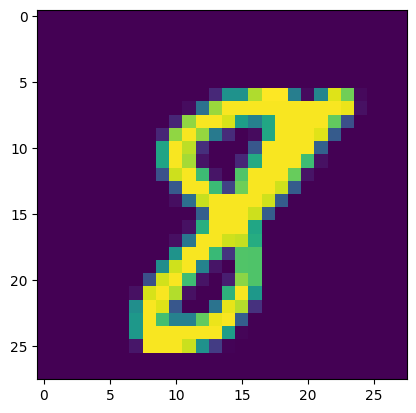

In [4]:
plt.imshow(train_data[55])

**Creando un modelo de datos**

In [13]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Summary no deja ver que tenemos 2 capas, la primeras ccon 512 neuronas y maneja esa cant de parametros.
La segunda capa con 10 neuronas y sus parámetros.

Limpieza de datos

In [15]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

Esto es una tranformación

In [9]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Esta es la clasificación de la imagen

In [10]:
train_labels[0]

5

Así maneja la data la red neuronal de maneral vectorial

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Lo que hicimos antes fue configurar la aruitectura de datos, modelo compilado y limpiar los datos. Ahora tenemos que entrenar la red:

In [16]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 4ms/step - loss: 0.2655 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1070 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0702 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9887


fit(le damos nuestros sets de datos y las iteraciones o epocas y lotes de 128 unidades.) El proceso que empieza es el entrenamiento de la red, son todos calculos matematicos que desconocemos.

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9741


[0.08517494797706604, 0.9740999937057495]

Aquí evaluamos como funciona la red. No dice que tenemos una accuracy de 97%